In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [5]:
a = np.random.seed(7)
dataset = np.loadtxt('/content/drive/MyDrive/LDS8_Le Quang Anh Tu/week2/Chapter3/pima-indians-diabetes.csv',delimiter=',')
dataset[5]

array([  5.   , 116.   ,  74.   ,   0.   ,   0.   ,  25.6  ,   0.201,
        30.   ,   0.   ])

In [8]:
dataset.shape

(768, 9)

In [9]:
X = dataset[:,0:8]
y = dataset[:,8]

In [12]:
#build model
model = Sequential()

model.add(Dense(units=12, input_dim = 8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit model
history = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.3)

Epoch 1/200
17/17 [==============================] - 0s 9ms/step - loss: 5.3420 - accuracy: 0.6499 - val_loss: 6.3118 - val_accuracy: 0.5801
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 5.3435 - accuracy: 0.6499 - val_loss: 6.3128 - val_accuracy: 0.5844
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 5.2119 - accuracy: 0.6518 - val_loss: 6.4394 - val_accuracy: 0.5758
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 5.3408 - accuracy: 0.6518 - val_loss: 6.7662 - val_accuracy: 0.5541
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 5.2685 - accuracy: 0.6462 - val_loss: 6.2721 - val_accuracy: 0.5714
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 5.1542 - accuracy: 0.6592 - val_loss: 6.0644 - val_accuracy: 0.5974
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 5.2401 - accuracy: 0.6574 - val_loss: 5.8007 - val_accuracy: 0.6190
Epoch 8/200
1

In [17]:
print('Evaluate on test data')
results = model.evaluate(X, y)
print('loss-accuracy', results)

Evaluate on test data
24/24 [==============================] - 0s 2ms/step - loss: 5.1924 - accuracy: 0.6615
loss-accuracy [5.192389965057373, 0.6614583134651184]


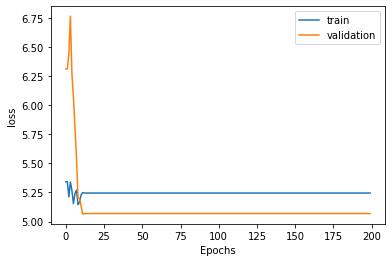

In [19]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()